#Q1.What is NumPy, and why is it widely used in Python?

##NumPy (Numerical Python) is a powerful library in Python primarily used for numerical computing. It provides support for working with arrays, matrices, and large, multi-dimensional data sets. NumPy forms the foundation for many scientific and data analysis libraries in Python, such as Pandas, SciPy, and scikit-learn.

###Why is NumPy Widely Used in Python?
- **Performance and Speed:** NumPy is written in C and is highly optimized for speed. Operations on NumPy arrays are significantly faster than using regular Python lists due to the implementation of vectorization and low-level optimizations.
- **Ease of Use:** It provides an easy-to-use interface for performing complex numerical computations, making it ideal for working with large datasets.
- **Memory Efficiency**: NumPy arrays consume less memory than traditional Python lists, and they enable the storage of large datasets in a more compact manner.
- **Broad Community and Ecosystem**: NumPy is widely used in the data science, machine learning, and scientific computing communities. The large number of tutorials, documentation, and community support make it accessible for beginners and professionals alike.
- **Seamless Integration**: NumPy arrays can be integrated with other libraries in Python, allowing for efficient handling of data in frameworks like Pandas for data manipulation or scikit-learn for machine learning.

#Q2. How does broadcasting work in NumPy?

##Broadcasting is a powerful feature in NumPy that allows you to perform arithmetic operations on arrays of different shapes and sizes. Rather than requiring arrays to have the same shape, NumPy automatically "broadcasts" the smaller array across the larger one to match their shapes, making operations more flexible and memory efficient.

###How Broadcasting Works
Broadcasting follows a set of rules to determine how arrays with different shapes are treated in element-wise operations.
- **Align the Shapes:** NumPy compares the shapes of the two arrays element-wise, starting from the rightmost dimension (the last axis). The shapes are aligned by prepending dimensions to the smaller array as needed.

- **Check Compatibility:** Two dimensions are compatible if:
 - They are equal.
 - One of the dimensions is 1.
-If the dimensions are not compatible (i.e., they don't satisfy the above conditions), broadcasting cannot be applied, and an error will occur.

- **Broadcast the Smaller Array**: Once the shapes are aligned and compatible, NumPy "stretches" or "broadcasts" the smaller array along the extra dimensions (where the size is 1) to match the shape of the larger array.


In [ ]:
#Example 1: Scalar and Array
import numpy as np
arr = np.array([[1, 2, 3], [4, 5, 6]])
result = arr + 10
print(result)

[[11 12 13]
 [14 15 16]]


In [ ]:
#Example 2: Two Arrays with Different Shapes
import numpy as np
arr1 = np.array([[1], [2], [3]])
arr2 = np.array([4, 5, 6])
result = arr1 + arr2
print(result)

[[5 6 7]
 [6 7 8]
 [7 8 9]]


In [ ]:
#Example 3: Broadcasting with Incompatible Shapes
#If the dimensions are not compatible, NumPy will raise an error.

import numpy as np
arr1 = np.array([[1, 2, 3], [4, 5, 6]])
# A 2x2 array (incompatible shape)
arr2 = np.array([[1, 2], [3, 4]])

# This will raise an error
result = arr1 + arr2

#In this case, the shapes (2, 3) and (2, 2) are incompatible, and broadcasting cannot occur, leading to an error.

ValueError: operands could not be broadcast together with shapes (2,3) (2,2) 

#Q3.What is a Pandas DataFrame?

###A Pandas DataFrame is one of the most important data structures in the Pandas library used for data manipulation and analysis in Python. It is essentially a two-dimensional labeled data structure, similar to a table in a relational database, an Excel spreadsheet.

####Key Features of a Pandas DataFrame:
- **Rows and Columns:** A DataFrame has both rows and columns, and each axis (row and column) is labeled.
 - Rows are indexed, and columns have labels (names).
- **Heterogeneous Data**: Unlike arrays, a DataFrame can store data of different types across columns (e.g., integers, floats, strings).
- **Size Mutability**: DataFrames are mutable, meaning you can add or remove columns and rows.
- **Data Alignment**: Automatically aligns data based on the index/label, allowing for easy data manipulation and operations like joins or merging.
- **Label-based Indexing**: You can access data using row and column labels, which makes it easier to handle and manipulate.



In [ ]:
#Example 1: Creating a DataFrame from a Dictionary:
import pandas as pd
data = {
    'Name': ['Nitin', 'peggy', 'Dolly'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Los Angeles', 'Chicago']
}

# Creating DataFrame
df = pd.DataFrame(data)

print(df)


    Name  Age         City
0  Nitin   25     New York
1  peggy   30  Los Angeles
2  Dolly   35      Chicago


In [ ]:
#Example 2: Creating a DataFrame from a List of Lists
import pandas as pd
data = [
    ['Nitin', 25, 'New York'],
    ['Peggy', 30, 'Los Angeles'],
    ['Dolly', 35, 'Chicago']
]
df = pd.DataFrame(data, columns=['Name', 'Age', 'City'])

print(df)

    Name  Age         City
0  Nitin   25     New York
1  Peggy   30  Los Angeles
2  Dolly   35      Chicago


#Q4.Explain the use of the groupby() method in Pandas?

###The groupby() method in Pandas is used to group data based on some criteria, allowing for efficient aggregation, transformation, and analysis of data. It works by splitting the data into groups, applying a function to each group, and then combining the results into a new DataFrame or Series.

##Key Steps in groupby():
- **Splitting:** Divides the data into groups based on the specified keys.
- **Applying:** Applies a function (e.g., aggregation, transformation, filtering) to each group.
- **Combining**: Combines the results into a new DataFrame or Series.

##Parameters:
- **by:** Specifies the grouping criteria (e.g., column name(s), index level(s), or a function).
- **axis:** Specifies the axis to group by (default is 0, which means rows).
- **as_index:** If True (default), group labels are set as the index; if False, the original structure is preserved.
- **level:** Groups by a specific level in a MultiIndex.
- **sort:** Sorts the groups by the group keys (default is True).




In [ ]:
#Example: Aggregation
import pandas as pd
data = {
    'Category': ['A', 'B', 'A', 'B', 'A', 'C'],
    'Values': [10, 20, 30, 40, 50, 60]
}
df = pd.DataFrame(data)
grouped = df.groupby('Category')['Values'].sum()

print(grouped)

Category
A    90
B    60
C    60
Name: Values, dtype: int64


In [ ]:
#2. Multiple Aggregations:
aggregated = df.groupby('Category').agg({'Values': ['sum', 'mean', 'count']})

print(aggregated)

         Values            
            sum  mean count
Category                   
A            90  30.0     3
B            60  30.0     2
C            60  60.0     1


In [ ]:
#3. Transformation:
df['Group_Mean'] = df.groupby('Category')['Values'].transform('mean')

print(df)

  Category  Values  Group_Mean
0        A      10        30.0
1        B      20        30.0
2        A      30        30.0
3        B      40        30.0
4        A      50        30.0
5        C      60        60.0


In [ ]:
#5. Iterating Over Groups:
for group_name, group_data in df.groupby('Category'):
    print(f"Group: {group_name}")
    print(group_data)
    print()

Group: A
  Category  Values  Group_Mean
0        A      10        30.0
2        A      30        30.0
4        A      50        30.0

Group: B
  Category  Values  Group_Mean
1        B      20        30.0
3        B      40        30.0

Group: C
  Category  Values  Group_Mean
5        C      60        60.0



#Q5. Why is Seaborn preferred for statistical visualizations?

###Seaborn is preferred for statistical visualizations in Python because it is specifically designed to create visually appealing, informative, and high-level statistical graphics with ease. It is built on top of Matplotlib and integrates closely with Pandas, making it highly efficient for handling data and plotting complex visualizations.

##**Reasons Seaborn is Preferred:**
- High-Level API: Seaborn provides high-level functions for creating complex visualizations with minimal code.
 - For example, functions like sns.relplot(), sns.catplot(), and sns.heatmap() simplify creating scatter plots, categorical plots, and heatmaps.

- Built-in Statistical Features: It includes built-in support for statistical plots like regression lines, distribution plots, and categorical comparisons.
 - Example: sns.regplot() automatically fits and visualizes a regression line over scatter plots.

- Ease of Customization: Seaborn uses default themes and color palettes, providing aesthetically pleasing plots out of the box.
 - Customization options allow fine-tuning of plot elements to fit specific needs.

- Integration with Pandas: Seaborn works seamlessly with Pandas DataFrames, allowing users to directly use column names for plotting.
 - This eliminates the need to extract or manipulate data manually.

- Support for Complex Statistical Relationships: Seaborn makes it easy to visualize complex relationships, such as trends between variables, distributions, and interactions across subgroups.

- Wide Range of Plot Types: Seaborn supports a variety of plots suited for statistical analysis, including:
 - Distribution plots: sns.histplot(), sns.kdeplot(), sns.boxplot()
 - Relationship plots: sns.scatterplot(), sns.lineplot(), sns.pairplot()
 - Categorical plots: sns.barplot(), sns.countplot()
 - Matrix plots: sns.heatmap(), sns.clustermap()


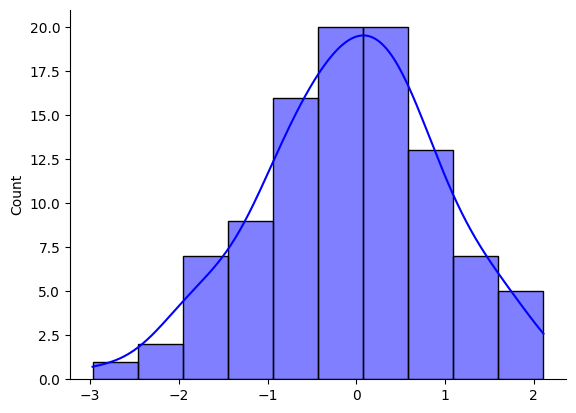

In [ ]:
#Example Seaborn:
import seaborn as sns
x = np.random.randn(100)

sns.histplot(x, kde=True, color='blue')
sns.despine()

#Q6.What are the differences between NumPy arrays and Python lists?

##NumPy arrays and Python lists are both used for storing collections of items, but they have key differences in terms of functionality, efficiency, and usability.

####NumPy arrays and Python lists are both used for storing collections of items, but they have key differences in terms of functionality, efficiency, and usability. Here's a detailed comparison:

##**Data Type Consistency**
- NumPy Arrays: Homogeneous: All elements in a NumPy array must be of the same data type (e.g., integers, floats, etc.).
 - This ensures better performance as operations are performed on fixed-type arrays.
- Python Lists: Heterogeneous: Python lists can hold elements of different data types (e.g., integers, strings, floats, etc.).

##**Performance and Speed**
- NumPy Arrays: Faster due to their optimized C implementation and contiguous memory storage.
 - Ideal for large-scale numerical computations.

- Python Lists: Slower because they are implemented in Python and store references to objects, which incurs overhead.

##**Memory Usage**
- NumPy Arrays: More memory-efficient as they store data in a compact and contiguous block of memory.
 - NumPy uses less memory by leveraging fixed-type storage.
- Python Lists: Less memory-efficient because they store pointers to objects, leading to higher memory usage.

##**Functionality**
- NumPy Arrays: Supports advanced mathematical and statistical operations like matrix multiplication, element-wise operations, and broadcasting.
 - Provides built-in functions for linear algebra, Fourier transforms, etc.
- Python Lists: Basic functionality for appending, slicing, and indexing.
 - Does not support vectorized operations or advanced computations directly.

 ##**Broadcasting**
- NumPy Arrays: Supports broadcasting, enabling operations between arrays of different shapes.
- Python Lists: No broadcasting; element-wise operations must match in length or require explicit looping.

##**Element-Wise Operations**
- NumPy Arrays: Supports element-wise operations directly.
- Python Lists: Element-wise operations must be performed using loops or list comprehensions.


In [ ]:
#Example: NumPy Arrays
import numpy as np
arr = np.array([1, 2, 3])
print(arr * 2)

[2 4 6]


In [ ]:
#Example: Python Lists:
my_list = [1, 2, 3]
print([x * 2 for x in my_list])


[2, 4, 6]


#Q7. What is a heatmap, and when should it be used?

###A heatmap is a data visualization technique that uses color gradients to represent the magnitude of values in a two-dimensional matrix or table. Each cell in the matrix is colored according to its value, making it easy to identify patterns, trends, and outliers in the data.

- In Python, libraries like Seaborn and Matplotlib are often used to create heatmaps.

##Key Features of a Heatmap
- Visualizes numerical data across two axes (e.g., rows and columns of a matrix).
- Colors represent the intensity or magnitude of values.
- Helps in identifying correlations, clusters, or distribution patterns in data.

#When Should a Heatmap Be Used?
A heatmap is most useful in the following scenarios:
- Analyzing Correlations: To visualize correlations between variables in a dataset.
 - Example: A correlation matrix of a dataset where darker or lighter colors indicate stronger positive or negative correlations.
 - Use Case: Exploratory Data Analysis (EDA) in machine learning or statistics.
- Displaying Matrix Data: To represent large matrices or grids where each cell has a specific value.
 - Example: Visualizing a confusion matrix in machine learning to assess model performance.
- Finding Patterns in Data: To spot trends, clusters, or outliers.
 - Example: A heatmap showing website traffic over time, where rows represent days and columns represent hours.
- Analyzing Relationships: To study relationships across two dimensions or categories.
 - Example: Heatmaps in biology to represent gene expression data.
- Highlighting Intensity: To depict the intensity of an event over time or space.
 - Example: Geographic heatmaps to show population density or weather intensity.


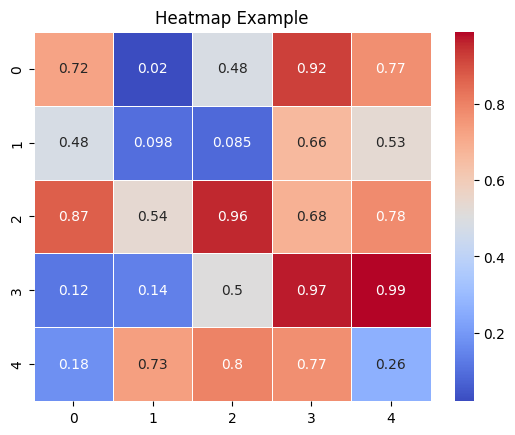

In [ ]:
#Example:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

data = np.random.rand(5, 5)
sns.heatmap(data, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Heatmap Example")
plt.show()

#Q8. What does the term “vectorized operation” mean in NumPy?

###A vectorized operation in NumPy refers to performing operations on entire arrays (or large chunks of data) without explicitly using loops. These operations leverage highly optimized C and Fortran code under the hood, making them faster and more efficient than traditional element-wise computations in Python.

####**Key Features of Vectorized Operations**
- Element-wise Execution: Operations are automatically applied to all elements of an array.
 - Example: Adding two arrays, multiplying, or applying mathematical functions like sin or sqrt.
- No Explicit Loops:CEliminates the need for writing Python loops (e.g., for or while) to iterate over array elements.
 - Example: Instead of looping through elements to add two arrays, you can directly perform array1 + array2.
- Faster Execution: Uses underlying low-level optimizations in NumPy (e.g., SIMD vectorized instructions).
 - Significantly faster compared to native Python loops, especially for large datasets.
- Cleaner Code: Makes the code more concise, readable, and easier to debug.



In [ ]:
#Example of Vectorized Operations
#Without Vectorization (Using Loops):
import numpy as np

array1 = np.array([1, 2, 3, 4])
array2 = np.array([5, 6, 7, 8])
result = []
for i in range(len(array1)):
    result.append(array1[i] + array2[i])
print(result)

[6, 8, 10, 12]


In [ ]:
#With Vectorization:
result = array1 + array2
print(result)

[ 6  8 10 12]


#Q9. How does Matplotlib differ from Plotly?
###Matplotlib and Plotly are two popular Python libraries for creating visualizations. While both are powerful, they have distinct features and are suited for different purposes.

##Type of Visualizations
- Matplotlib: Focuses on static and simple visualizations.
 - Suitable for academic, publication-quality plots (e.g., line charts, bar plots, scatter plots).
 - Limited interactivity out of the box.
- Plotly: Designed for interactive and dynamic visualizations.
 - Ideal for web-based dashboards and interactive visualizations like zoomable graphs, hover effects, and responsive layouts.

##Interactivity
- Matplotlib: Primarily generates static plots.
 - Limited interactivity via extensions like mplcursors or matplotlib.widgets.
- Plotly: Highly interactive by default.
 - Features like tooltips (hover information), zooming, panning, and exporting plots directly to HTML.

##Ease of Use
- Matplotlib: Steeper learning curve for customization.
 - Requires more code for advanced plots or visual adjustments.
- Plotly: Simplifies complex interactive plots with minimal code.
 - Built-in features make creating polished visuals faster.

##Customization
- Matplotlib: Highly customizable but requires detailed configurations.
 - Offers control over every aspect of the plot (e.g., axes, ticks, legends).
- Plotly: Provides good customization but less granular control compared to Matplotlib.
 - Relies more on predefined templates and settings.

##Output Formats
- Matplotlib: Outputs static images in formats like PNG, PDF, and SVG.
 - Best suited for reports and printed materials.
- Plotly: Outputs dynamic, interactive plots that can be exported as HTML files.
 - Excellent for web applications and presentations.

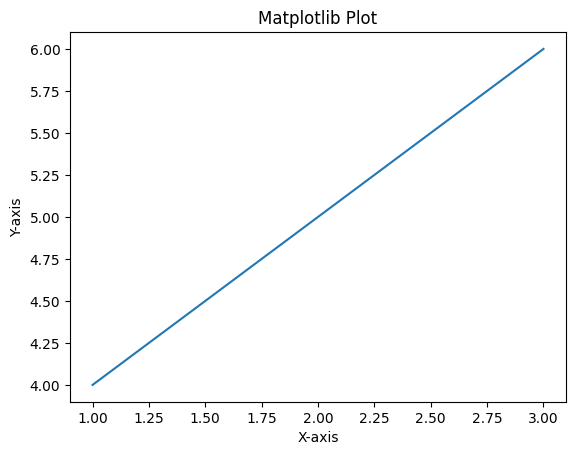

In [ ]:
#Example: Matplotlib
import matplotlib.pyplot as plt
plt.plot([1, 2, 3], [4, 5, 6])
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Matplotlib Plot")
plt.show()

In [ ]:
#Example: Plotly
import plotly.express as px
fig = px.line(x=[1, 2, 3], y=[4, 5, 6], title="Plotly Plot")
fig.show()

#Q10. What is the significance of hierarchical indexing in Pandas?

###Hierarchical indexing, also known as MultiIndexing, is a powerful feature in Pandas that allows you to create and work with multi-level or hierarchical row and column indexes. It is particularly useful when dealing with datasets with multiple dimensions or categories.

##Key Features and Significance
- Representation of Multi-Dimensional Data in 2D Format: Hierarchical indexing allows a single DataFrame to represent data with multiple dimensions (e.g., time, location, category).


In [ ]:
#Example:
import pandas as pd
data = pd.DataFrame({
    'City': ['Delhi', 'Delhi', 'Mumbai', 'Mumbai'],
    'Year': [2020, 2021, 2020, 2021],
    'Population': [19, 20, 12, 13]
})
df = data.set_index(['City', 'Year'])
print(df)

             Population
City   Year            
Delhi  2020          19
       2021          20
Mumbai 2020          12
       2021          13


- Facilitates Complex Data Analysis: Makes it easier to slice, subset, and aggregate data across multiple dimensions.


In [ ]:
#Example: Retrieve the population of Delhi in 2021:
df.loc[('Delhi', 2021)]

,Delhi
,2021
Population,20


- Efficient Grouping and Aggregation: Hierarchical indexing works seamlessly with the groupby() method, enabling efficient aggregation at different levels.

In [ ]:
#Example:
df.groupby(level='City').mean()

,Population
City,
Delhi,19.5
Mumbai,12.5


from matplotlib import pyplot as plt
_df_0['Population'].plot(kind='hist', bins=20, title='Population')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('City').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Population'].plot(kind='line', figsize=(8, 4), title='Population')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['City'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Population', y='City', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

- Advanced Indexing and Slicing: Supports advanced indexing capabilities for multi-level data.


In [ ]:
#Example:Retrieve data for all years in Delhi:
df.loc['Delhi']

,Population
Year,
2020,19
2021,20


from matplotlib import pyplot as plt
_df_4['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Population'].plot(kind='hist', bins=20, title='Population')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Year', y='Population', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Population']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Population'}, axis=1)
              .sort_values('Population', ascending=True))
  xs = counted['Population']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Population', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Population')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Population'].plot(kind='line', figsize=(8, 4), title='Population')
plt.gca().spines[['top', 'right']].set_visible(False)

#Q11. What is the role of Seaborn’s pairplot() function?

##The pairplot() function in Seaborn is used for creating a grid of pairwise scatter plots and histograms for exploring relationships between multiple numerical variables in a dataset. It is particularly useful for visualizing patterns, trends, and correlations within datasets.

###Key Features and Roles of pairplot()
- Visualization of Relationships Across Multiple Variables: Plots pairwise scatter plots for all numerical variables, showing how they relate to each other.
 - Helps in identifying correlations, clusters, or trends between variables


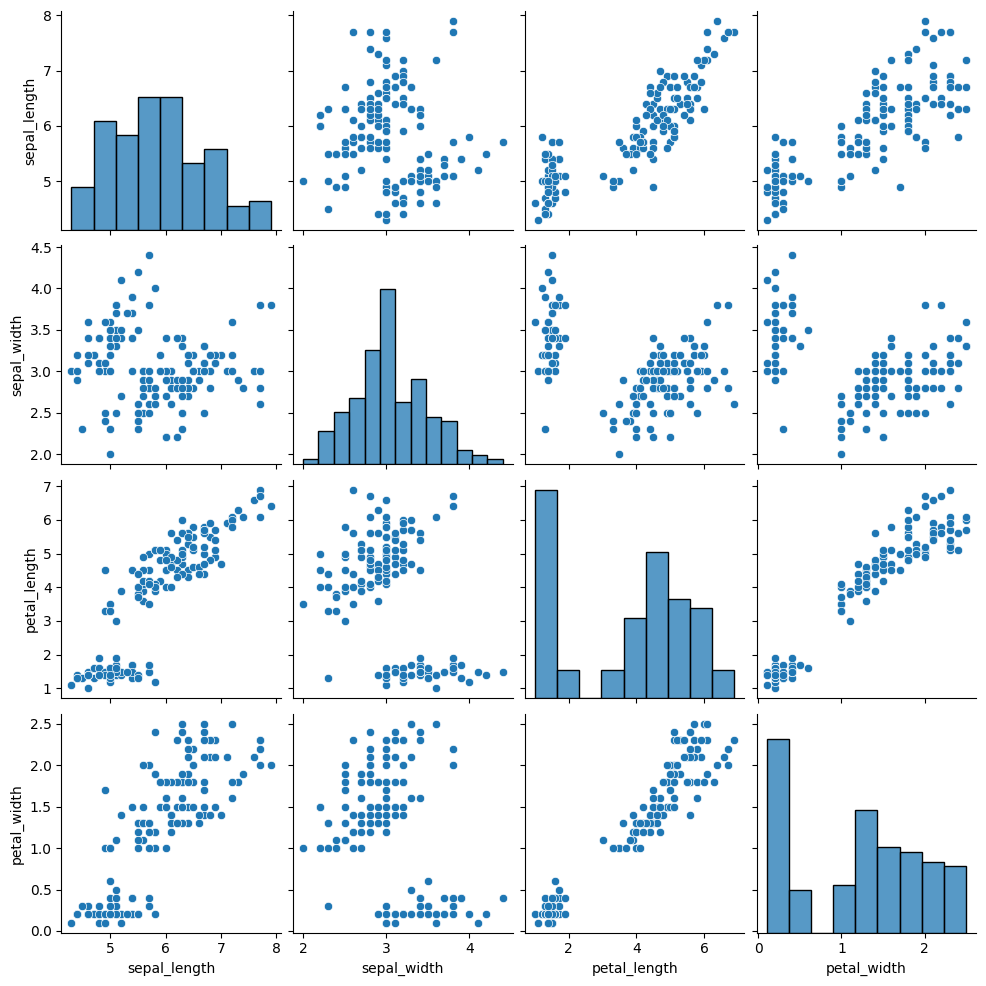

In [ ]:
#Example:
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('iris')
sns.pairplot(df)
plt.show()

- Diagonal Distribution: Displays histograms or KDE (Kernel Density Estimation) plots of individual variables along the diagonal, providing insights into their distribution.
- Categorical Differentiation: Allows differentiation of data points based on a categorical variable by using different colors.
 - This is useful for distinguishing groups or classes in the data.

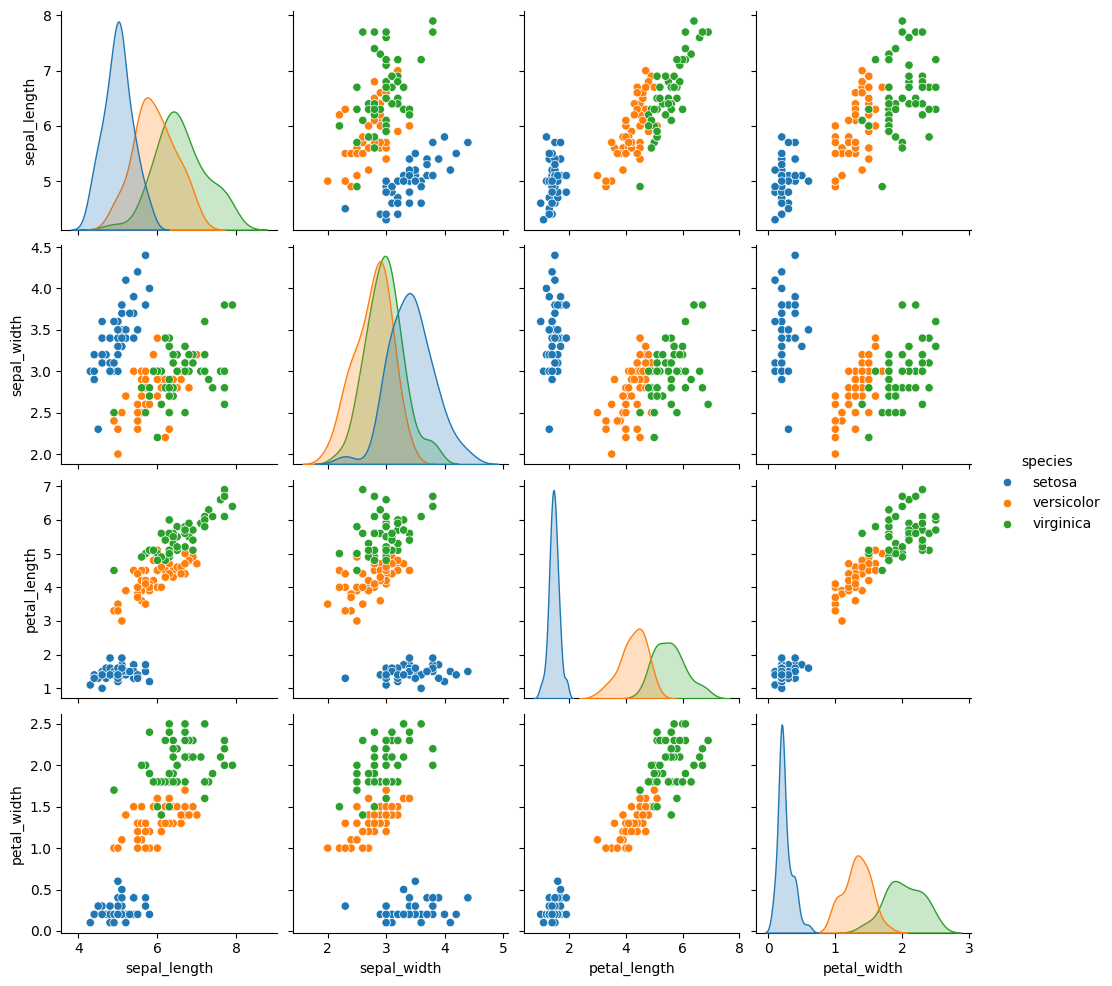

In [ ]:
#Example:
sns.pairplot(df, hue='species')
plt.show()

- Customizability: The plots can be customized with additional arguments:
 - kind: Specifies the type of plot (e.g., "scatter", "kde").
 - diag_kind: Specifies the type of plot for the diagonal (e.g., "hist", "kde").
 - palette: Defines the color palette for distinguishing categorical groups.
 - markers: Customizes markers for different categories.

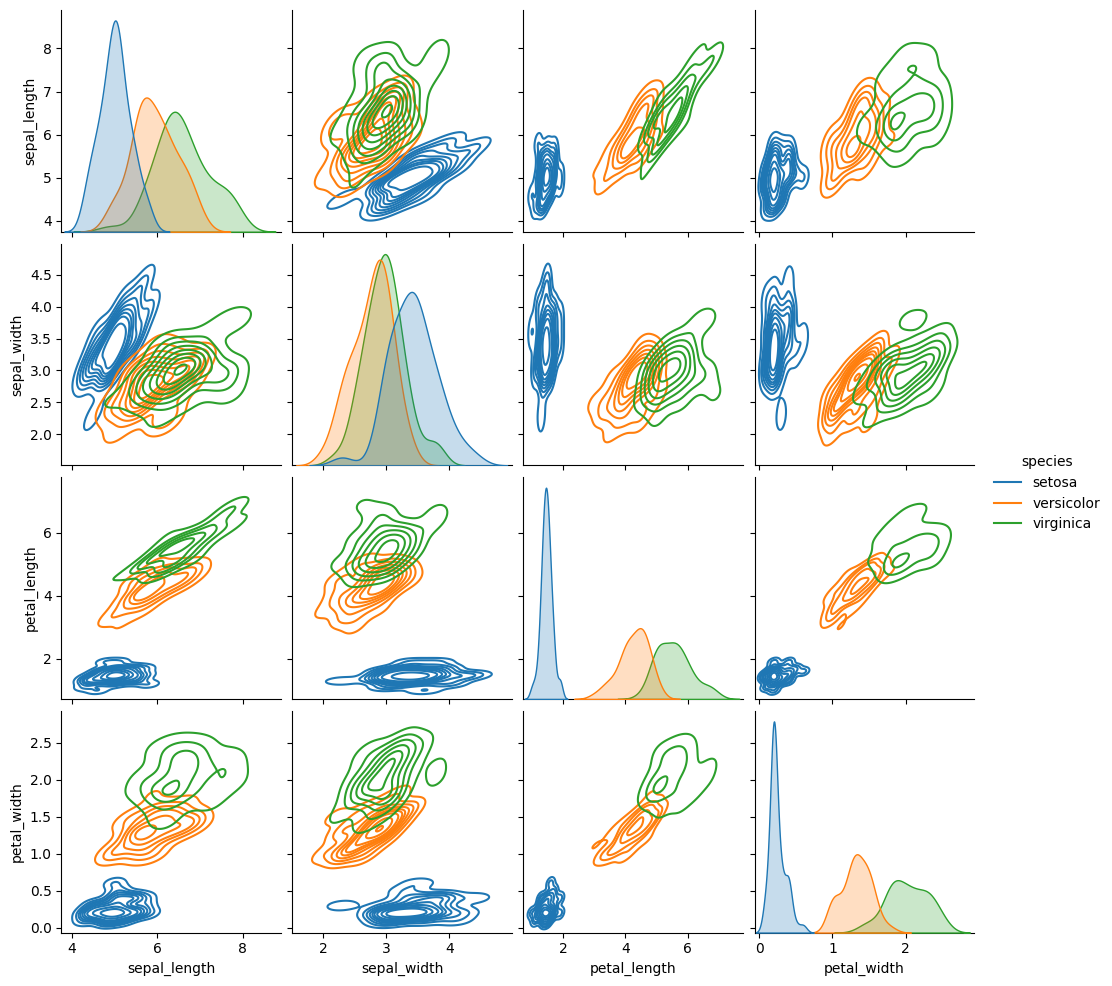

In [ ]:
#Example with KDE:
sns.pairplot(df, hue='species', kind='kde', diag_kind='kde')
plt.show()

#Q12. What is the purpose of the describe() function in Pandas?

##The describe() function in Pandas provides a statistical summary of the numerical or categorical columns in a DataFrame. It is primarily used during exploratory data analysis (EDA) to understand the distribution, central tendency, and spread of the data.

### Key Features of describe()
- **Summary Statistics for Numerical Data (Default Behavior):** When applied to a DataFrame or Series, it computes the following statistics for numerical columns:
 - Count: The number of non-NA/null values.
 - Mean: The average of the values.
 - Standard Deviation (std): A measure of how spread out the data is.
 - Minimum (min): The smallest value in the column.
 - 25th Percentile (Q1): The value below which 25% of the data falls.
 - Median (50th Percentile, Q2): The middle value.
 - 75th Percentile (Q3): The value below which 75% of the data falls.
 - Maximum (max): The largest value in the column.



In [ ]:
#Example:
import pandas as pd
data = {'A': [1, 2, 3, 4, 5], 'B': [5, 4, 3, 2, 1]}
df = pd.DataFrame(data)
print(df.describe())

              A         B
count  5.000000  5.000000
mean   3.000000  3.000000
std    1.581139  1.581139
min    1.000000  1.000000
25%    2.000000  2.000000
50%    3.000000  3.000000
75%    4.000000  4.000000
max    5.000000  5.000000


- Summary Statistics for Categorical Data (include=['object']): When explicitly specified, it summarizes categorical columns, providing:
 - Count: Number of non-null values.
 - Unique: Number of unique categories.
 - Top: The most frequently occurring category.
 - Freq: The frequency of the top category.


In [ ]:
#Example:
data = {'Name': ['Nitin', 'peggy', 'Nitin', 'dolly', 'YO BOY']}
df = pd.DataFrame(data)
print(df.describe(include=['object']))

         Name
count       5
unique      4
top     Nitin
freq        2


In [ ]:
#Handling Mixed Data Types: By default, it only summarizes numerical columns. To include all columns, you can use:
df.describe(include='all')

,Name
count,5
unique,4
top,Nitin
freq,2


#Q13. Why is handling missing data important in Pandas?

###Handling missing data is a critical step in data analysis and preparation because missing values can significantly affect the accuracy and interpretability of analyses, models, and visualizations. Pandas provides various tools to identify, handle, and address missing data effectively.

##Key Reasons to Handle Missing Data
###Preserving Data Quality
- Missing data can introduce bias and lead to incorrect conclusions.
- Analyses performed without addressing missing values may produce incomplete or unreliable results.

###Ensuring Model Accuracy
- Many machine learning algorithms and statistical models cannot handle missing data directly.
- Ignoring missing data can result in inaccurate predictions and skewed model performance.

###Avoiding Runtime Errors
- Operations like mathematical calculations, aggregations, or plotting may fail when encountering missing values.
- Proper handling ensures smooth execution of workflows.

###Maintaining Dataset Usability
- Missing data reduces the usability of the dataset for downstream tasks.
- Filling or imputing missing values allows the dataset to retain its analytical utility.

###Understanding Data Patterns
- Missing data can provide insights into data collection issues, patterns, or systemic problems.
- For instance, if values are missing systematically (e.g., certain regions or time periods), this may indicate data collection flaws.

##Common Techniques for Handling Missing Data in Pandas

- Identifying Missing Data: Use functions like .isnull() or .notnull() to identify missing values.


In [ ]:
#Example:
import pandas as pd
df = pd.DataFrame({'A': [1, 2, None], 'B': [4, None, 6]})
print(df.isnull())

       A      B
0  False  False
1  False   True
2   True  False


In [ ]:
#Dropping Missing Data: Remove rows or columns with missing values using .dropna().
df_clean = df.dropna()

In [ ]:
#Interpolation: Use interpolation to estimate missing values based on neighboring data points.
df.interpolate(method='linear', inplace=True)


#Q14. What are the benefits of using Plotly for data visualization?
##Plotly is a powerful and versatile plotting library used for creating interactive and visually appealing charts. It offers several advantages that make it a popular choice for data visualization.

###Interactive Visualizations
- User Engagement: Plotly allows for interactive plots, where users can hover, zoom, pan, and click on elements, enhancing the exploratory nature of data analysis.
- Dynamic Exploration: This interaction helps users explore complex data and identify patterns or outliers more effectively.
- Example: Hover information shows more detailed insights as users interact with data points.

###High-Quality, Aesthetic Visuals
- Professional Appearance: Plotly creates beautiful, polished charts with smooth animations, making it ideal for creating professional visualizations for reports or presentations.
- Customizable: Users can customize colors, themes, labels, axes, and other components to create tailored visualizations.
- Example: Plotly provides a range of color schemes, layout options, and template styles.

###Integration with Other Libraries and Platforms
- Python Compatibility: Plotly works well with popular Python libraries like Pandas, NumPy, and SciPy.
- Jupyter Notebooks: It integrates smoothly with Jupyter Notebooks, enabling the display of interactive visualizations directly in the notebook.
- Web Integration: Plotly visualizations can be embedded in web apps or shared as interactive plots on websites and dashboards.

###Easy to Learn and Use
- Simple API: Plotly has an intuitive syntax and simple API that makes it easy to create complex visualizations without extensive programming knowledge.
- Interactive Docs: The Plotly documentation includes interactive examples, making it easier for users to learn and implement various types of charts.

###Data Handling and Performance
- Efficient with Large Datasets: Plotly handles large datasets more efficiently than some other libraries by using WebGL for rendering high-performance visualizations.
- Smooth Rendering: When dealing with large datasets, Plotly renders the plot smoothly without freezing or slowing down.


#Q15.  How does NumPy handle multidimensional arrays?
##NumPy provides powerful tools for handling multidimensional arrays, allowing you to work efficiently with large datasets and perform complex mathematical operations on them. Below is an explanation of how NumPy handles multidimensional arrays:

###Creating Multidimensional Arrays
- ndarray (n-dimensional array) is the core data structure used in NumPy to represent multidimensional arrays. An ndarray can have any number of dimensions (from 1D to nD).

###Shape and Dimensions
- The shape attribute of a NumPy array returns a tuple that describes the dimensions of the array (number of rows, columns, etc.).
- The ndim attribute returns the number of dimensions (axes) of the array.

###Reshaping Multidimensional Arrays
- NumPy provides the reshape() method to change the shape of an array without changing its data. This is useful when you want to transform a multidimensional array into a different shape.

###Transpose of Multidimensional Arrays
- Transposing swaps the rows and columns of a multidimensional array. You can use the .T attribute to transpose the array.

###Vectorized Operations
- NumPy arrays allow for vectorized operations, which means you can perform element-wise operations on entire arrays (or slices) without needing explicit loops. This is one of the major advantages of using NumPy, as it allows for fast computations.



In [ ]:
#Example: Creating Multidimensional Arrays
import numpy as np
arr_2d = np.array([[1, 2, 3], [4, 5, 6]])

arr_3d = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

In [ ]:
#Example: Shape and Dimensions
arr_2d.shape
arr_2d.ndim
arr_3d.shape
arr_3d.ndim

In [ ]:
#Example: Reshaping Multidimensional Arrays
arr = np.array([1, 2, 3, 4, 5, 6])
reshaped_arr = arr.reshape(2, 3)

In [ ]:
#Transpose of Multidimensional Arrays
arr_2d = np.array([[1, 2, 3], [4, 5, 6]])
transposed_arr = arr_2d.T

In [ ]:
#Example: Vectorized Operations
arr_2d = np.array([[1, 2, 3], [4, 5, 6]])
result = arr_2d * 2

#Q16. What is the role of Bokeh in data visualization?
###Bokeh is a powerful, interactive visualization library for Python that helps in creating dynamic and visually appealing plots, graphs, and dashboards for web applications. It is specifically designed to handle large datasets and deliver high-quality interactive plots for users, enabling smooth exploration of data.

##Key Features:
- Interactivity: Bokeh allows for the creation of interactive visualizations with features such as zoom, pan, hover tools, and sliders, enabling users to interact directly with the data.
- Web-based Output: Bokeh visualizations can be rendered directly in web browsers, allowing for seamless integration into web applications and dashboards.
- Integration with Other Tools: It integrates well with other data analysis tools like Pandas, NumPy, and SciPy, making it a versatile tool in the data science ecosystem.
- Large Dataset Handling: It efficiently handles large-scale datasets, making it suitable for real-time data visualization.
- Customization: Bokeh offers extensive customization options for plot styles, axes, labels, and tooltips, allowing developers to tailor the visual output to their specific needs.
- Rich Visuals: It supports diverse plot types such as scatter plots, line charts, bar charts, heatmaps, and geospatial maps, ensuring flexibility in visualizing different types of data.

#Q17. Explain the difference between apply() and map() in Pandas?

###In Pandas, both apply() and map() are used to apply functions to data, but they differ in their behavior, usage, and flexibility.

##apply()
#Usage:
- apply() can be used on both Series and DataFrame.
- It is versatile and allows you to apply a function along the axis (rows or columns) of a DataFrame or to a Series.

#Function:
- For Series: It applies the function to each element of the Series.
- For DataFrame: You can specify the axis (axis=0 for columns, axis=1 for rows) to apply the function across the entire row or column.

#Flexibility:
- apply() is more flexible as it can accept functions that return multiple values or involve complex operations.
- It works well for custom functions, lambda functions, and aggregation operations.

#Performance:
- Since it is more flexible, apply() can be slower than map() for simple element-wise operations.

##map()
#Usage:
- map() is specifically used for Series.
- It is simpler and designed for element-wise transformations or mappings, typically used with dictionaries, functions, or Series.

#Function:
- It applies a function to each element of the Series, directly mapping it without the need to specify the axis (works only along the Series).

#Flexibility:
- map() is generally used for simpler operations compared to apply(). It is ideal for replacing or transforming values (e.g., mapping values from one set to another).

#Performance:
- map() is faster than apply() for element-wise operations because it is optimized for such use cases.



In [ ]:
#Example: Using apply() with a Series
import pandas as pd

s = pd.Series([1, 2, 3, 4])

squared_series = s.apply(lambda x: x**2)

print("Using apply() on Series:")
print(squared_series)

Using apply() on Series:
0     1
1     4
2     9
3    16
dtype: int64


In [ ]:
#Example: Using apply() with a DataFrame
import pandas as pd

df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

column_sums = df.apply(lambda x: x.sum(), axis=0)

print("Using apply() on DataFrame (Sum of columns):")
print(column_sums)

Using apply() on DataFrame (Sum of columns):
A     6
B    15
dtype: int64


In [ ]:
#Example: Using map() with a Series
import pandas as pd

s = pd.Series([1, 2, 3, 4])

mapped_series = s.map({1: 'one', 2: 'two', 3: 'three', 4: 'four'})

print("Using map() on Series:")
print(mapped_series)

Using map() on Series:
0      one
1      two
2    three
3     four
dtype: object


In [ ]:
#Example: Using map() with a Function
import pandas as pd

s = pd.Series([1, 2, 3, 4])

squared_series = s.map(lambda x: x**2)

print("Using map() with a function:")
print(squared_series)

Using map() with a function:
0     1
1     4
2     9
3    16
dtype: int64


#Q18. What are some advanced features of NumPy?

##NumPy is a powerful library for numerical computing in Python, and it offers several advanced features that enable efficient handling of large datasets and complex numerical computations.

###Broadcasting
- Definition: Broadcasting allows NumPy to perform element-wise operations on arrays of different shapes, which are not explicitly compatible. NumPy automatically adjusts the shapes of arrays to make them compatible for arithmetic operations.
- Example: Adding a scalar to a matrix, or performing operations between arrays with different shapes.

###Universal Functions (ufuncs)
- Definition: ufuncs are functions that perform element-wise operations on NumPy arrays, such as addition, multiplication, square root, and more. They are highly optimized for performance.
- Example: np.add(), np.sqrt(), np.sin(), etc.

###Advanced Indexing and Slicing
- Definition: NumPy allows advanced indexing and slicing techniques, which include:
 - Boolean indexing: Selecting elements that satisfy a condition.
 - Fancy indexing: Selecting elements by passing an array of indices.

###Linear Algebra
- Definition: NumPy provides a robust set of linear algebra operations, including matrix multiplication, determinant calculation, eigenvalue/eigenvector computation, and solving systems of linear equations.

###Random Sampling
- Definition: NumPy has a module numpy.random that supports generating random numbers and performing random sampling. This includes generating random arrays, sampling from a distribution, and setting random seeds for reproducibility.



In [ ]:
#Example: Broadcasting
import numpy as np

A = np.array([[1, 2], [3, 4]])

b = 5

result = A + b
print(result)

[[6 7]
 [8 9]]


In [ ]:
#Example: Universal Functions (ufuncs)
import numpy as np

arr = np.array([4, 9, 16, 25])
sqrt_arr = np.sqrt(arr)
print(sqrt_arr)

[2. 3. 4. 5.]


In [ ]:
#Example of Boolean Indexing:
import numpy as np

arr = np.array([1, 2, 3, 4, 5, 6])

filtered_arr = arr[arr > 3]
print(filtered_arr)

[4 5 6]


In [ ]:
#Example: Linear Algebra
import numpy as np

A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

result = np.dot(A, B)
print(result)

[[19 22]
 [43 50]]


In [ ]:
#Example: Random Sampling
import numpy as np

random_matrix = np.random.rand(3, 3)
print(random_matrix)

random_int = np.random.randint(0, 10)
print(random_int)

[[0.45626532 0.35980737 0.55460852]
 [0.33011842 0.4629573  0.80166844]
 [0.92737896 0.45798728 0.74213968]]
0


#Q19. How does Pandas simplify time series analysis?
###Pandas is a powerful library for data manipulation and analysis in Python, and it offers several features that simplify time series analysis. Time series analysis involves analyzing data that is collected or recorded over time. Pandas provides tools and functionalities that make working with time series data intuitive, efficient, and easier to manage.

####Date and Time Handling
- Pandas provides built-in support for datetime data types, allowing easy manipulation of time-related data.
- You can work with timestamps (datetime64), which makes operations like filtering, sorting, and grouping by time straightforward.

####Frequency Handling and Resampling
- Pandas allows you to easily handle time series data with different frequencies, such as daily, monthly, or yearly data.
- You can use resampling to change the frequency of your time series data, allowing you to upsample (e.g., from daily to hourly) or downsample (e.g., from hourly to daily).

####Handling Missing Data (NaN)
- Pandas provides built-in support to handle missing data in time series analysis. Functions like fillna(), interpolate(), and dropna() help you fill or remove missing values easily.

####Date Offsets and Shifting
- Pandas makes it easy to perform shifting and lagging operations, which are crucial for time series analysis (e.g., creating moving averages or calculating differences between time periods).
- You can use the shift() function to shift data forward or backward by a specific time period.

####Time-based Indexing and Slicing
- Pandas allows you to index and slice time series data based on specific dates or time ranges. This makes it easy to work with specific time periods.
- Datetime indexing enables you to access data for specific dates, months, or years easily.

####Rolling Windows and Moving Averages
- Pandas provides a built-in method for calculating rolling windows, such as moving averages, which are essential for time series smoothing.
- The rolling() function allows you to specify a window size and apply aggregation functions like mean, sum, etc.

In [ ]:
#Example: Date and Time Handling
import pandas as pd

dates = pd.date_range('2023-01-01', periods=5, freq='D')
data = [10, 20, 30, 40, 50]

ts = pd.Series(data, index=dates)

print(ts)

2023-01-01    10
2023-01-02    20
2023-01-03    30
2023-01-04    40
2023-01-05    50
Freq: D, dtype: int64


In [ ]:
#Example: Frequency Handling and Resampling
ts = pd.Series([10, 20, 30, 40, 50], index=pd.date_range('2023-01-01', periods=5, freq='D'))

monthly_ts = ts.resample('M').sum()
print(monthly_ts)

2023-01-31    150
Freq: ME, dtype: int64


<ipython-input-20-22d1f5dc2d58>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_ts = ts.resample('M').sum()


In [ ]:
#Example: Handling Missing Data (NaN)
ts = pd.Series([1, 2, None, 4, 5], index=pd.date_range('2023-01-01', periods=5, freq='D'))

ts_filled = ts.fillna(method='ffill')
print(ts_filled)

2023-01-01    1.0
2023-01-02    2.0
2023-01-03    2.0
2023-01-04    4.0
2023-01-05    5.0
Freq: D, dtype: float64


<ipython-input-21-35fc10ed5762>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts_filled = ts.fillna(method='ffill')


In [22]:
#Example: Date Offsets and Shifting
ts = pd.Series([1, 2, 3, 4, 5], index=pd.date_range('2023-01-01', periods=5, freq='D'))

ts_shifted = ts.shift(1)
print(ts_shifted)

2023-01-01    NaN
2023-01-02    1.0
2023-01-03    2.0
2023-01-04    3.0
2023-01-05    4.0
Freq: D, dtype: float64


In [23]:
#Example Time-based Indexing and Slicing
ts = pd.Series([1, 2, 3, 4, 5], index=pd.date_range('2023-01-01', periods=5, freq='D'))

ts_slice = ts['2023-01-02':'2023-01-04']
print(ts_slice)

2023-01-02    2
2023-01-03    3
2023-01-04    4
Freq: D, dtype: int64


In [24]:
#Example: Time Zone Handling
ts = pd.Series([1, 2, 3], index=pd.date_range('2023-01-01', periods=3, freq='D'))

ts_tz = ts.tz_localize('UTC')
print(ts_tz)

2023-01-01 00:00:00+00:00    1
2023-01-02 00:00:00+00:00    2
2023-01-03 00:00:00+00:00    3
Freq: D, dtype: int64


#Q20. What is the role of a pivot table in Pandas?
##A pivot table in Pandas is a powerful tool for summarizing and analyzing data. It allows you to aggregate, reshape, and reorganize your data in a more readable and interpretable format, especially when dealing with large datasets. Pivot tables are particularly useful when you need to transform data from a long format to a wide format, based on certain variables.

###Role of Pivot Tables in Pandas:
##Data Aggregation:
- A pivot table helps in grouping and aggregating data based on specific columns or categories, providing you with summary statistics like sums, averages, counts, etc., for different subsets of data.
- For example, you can aggregate sales data by product and region to compute the total sales per region for each product.

##Reshaping Data:
- It allows you to reshape data by transforming long-format data (where each row is a single observation) into a wide-format (where each unique value of a column becomes a separate column).
- Pivot tables essentially "pivot" the data, rearranging the rows and columns based on the chosen index and columns.

##Multi-level Indexing:
- Pivot tables support multi-level indexing for more complex data structures. - You can create hierarchical rows and columns by using multiple index levels, which allows for deeper analysis.

##Simplification of Complex Analysis:
- Pivot tables make complex data analysis more digestible by summarizing it in a concise, structured format. This is particularly helpful for visualizing trends or making comparisons between different categories or groups.

##Flexibility in Data Exploration:
- They offer flexibility by enabling you to experiment with different aggregations, column/groupings, and data structures without altering the original dataset.



In [25]:
#Example of a Pivot Table in Pandas:
import pandas as pd

data = {
    'Date': ['2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02', '2023-01-03'],
    'Region': ['North', 'South', 'North', 'South', 'North'],
    'Product': ['A', 'A', 'B', 'B', 'A'],
    'Sales': [100, 150, 200, 250, 300]
}

df = pd.DataFrame(data)

pivot_table = pd.pivot_table(df, values='Sales', index='Date', columns='Region', aggfunc='sum')

print(pivot_table)

Region      North  South
Date                    
2023-01-01  100.0  150.0
2023-01-02  200.0  250.0
2023-01-03  300.0    NaN


#Q21. Why is NumPy’s array slicing faster than Python’s list slicing?
##NumPy's array slicing is faster than Python's list slicing due to several key differences in how NumPy and Python lists are implemented and how they handle slicing operations.
#1. Memory Layout and Contiguous Blocks:
- NumPy arrays: NumPy arrays are stored in contiguous blocks of memory (using a single, fixed-size data type for all elements). This contiguous memory layout makes it easy for NumPy to quickly access, copy, or modify slices of the array without needing to create intermediate objects.
- Python lists: Python lists are implemented as arrays of pointers to objects, which means each element in the list can be of a different type and stored non-contiguously. When slicing a list, Python needs to create a new list, copy the pointers, and potentially allocate new memory for the sliced portion. This introduces overhead.

#2. Array vs. List Overhead:
- NumPy arrays: Slicing a NumPy array is done by viewing a part of the original array in memory, rather than copying the data. This is efficient because NumPy only needs to create a new reference to the original data, with a new shape and stride, without needing to copy the underlying data.
- Python lists: When slicing a list, a new list is created, and elements are copied into it. Even if the slice is a simple subset, it results in additional memory allocation and copying, which adds overhead.

#3. Vectorized Operations:
- NumPy arrays: NumPy's core operations, including slicing, are implemented in highly optimized C and Fortran code. These operations can be executed directly in compiled code, which is much faster than Python’s interpreted execution.
- Python lists: Lists are part of the Python standard library, which means their slicing operations are implemented in Python, an interpreted language. This adds overhead compared to the low-level, optimized implementations of NumPy.

#4. Strides and View vs. Copy:
- NumPy arrays: NumPy uses strides to efficiently slice arrays. A stride is the number of bytes to step in each dimension when traversing the array. Instead of copying the data, NumPy just modifies the view to adjust the starting point and strides, leading to faster slicing. This is especially beneficial when slicing multidimensional arrays.
- Python lists: Lists do not have a concept of strides. Slicing a list results in the creation of a new list and copying the referenced elements from the original list, which is slower.

#5. Homogeneous vs. Heterogeneous Data:
- NumPy arrays: NumPy arrays store elements of the same type (e.g., all integers or all floats), allowing more efficient memory usage and faster access due to type consistency.
- Python lists: Python lists can hold heterogeneous types (e.g., integers, strings, objects), making it less memory efficient. The need to handle multiple types adds overhead when performing operations like slicing.


In [34]:
#Example: NumPy Slicing
import numpy as np
import time

arr = np.arange(1000000)

start_time = time.time()
slice_arr = arr[100:200]
end_time = time.time()

print("NumPy Sliced Array:", slice_arr)
print("Time taken for NumPy slicing:", end_time - start_time, "seconds")

NumPy Sliced Array: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199]
Time taken for NumPy slicing: 0.00011777877807617188 seconds


In [47]:
#Example: Slicing a Python List
import time

lst = list(range(1000000))

start_time = time.time()
slice_lst = lst[100:200]
end_time = time.time()

print("Python Sliced List:", slice_lst)
print("Time taken for Python list slicing:", end_time - start_time, "seconds")

Python Sliced List: [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
Time taken for Python list slicing: 0.0001621246337890625 seconds


#Q22. What are some common use cases for Seaborn?
###Seaborn is a powerful data visualization library built on top of Matplotlib, specifically designed for statistical plotting in Python. It simplifies the process of creating complex and informative visualizations.
Some common use cases for Seaborn:
##1. Visualizing Univariate Distributions
- Histograms and KDE plots (Kernel Density Estimation) are useful for visualizing the distribution of a single variable. Seaborn provides a simple way to plot these with enhanced aesthetics.
- Use Case: To understand the distribution (normal, skewed, etc.) of continuous data.

##2. Visualizing Bivariate Relationships
- Scatter plots, line plots, and hexbin plots allow for understanding relationships between two variables. Seaborn can add regression lines, confidence intervals, and more.
- Use Case: To explore how two continuous variables are correlated or related.

##3. Categorical Plots
- Box plots, violin plots, bar plots, and count plots are great for comparing categories of data and understanding the distribution within each category.
- Use Case: To compare distributions or aggregate statistics across different categories.

##4. Correlation Heatmaps
- Heatmaps are ideal for visualizing the correlation matrix of a dataset, making it easier to see relationships between multiple variables.
- Use Case: To quickly identify strong correlations between numerical features.

##5. Pairwise Relationships and Pair Plots
- Pair plots (also called scatterplot matrices) show the relationships between multiple variables at once. It automatically creates scatter plots for pairwise combinations of features and histograms or KDE plots along the diagonal.
- Use Case: To analyze pairwise relationships and visualize the interactions between multiple variables.


# **Practical**

---




#Q1. How do you create a 2D NumPy array and calculate the sum of each row?


In [49]:
import numpy as np

arr = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])

row_sums = np.sum(arr, axis=1)

print("2D NumPy Array:")
print(arr)
print("\nSum of each row:")
print(row_sums)


2D NumPy Array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Sum of each row:
[ 6 15 24]


#Q2.  Write a Pandas script to find the mean of a specific column in a DataFrame?


In [50]:
import pandas as pd

data = {
    'Name': ['Nitin', 'yo boy', 'Dolly', 'Peggy', 'lol'],
    'Age': [25, 30, 35, 40, 45],
    'Salary': [50000, 60000, 70000, 80000, 90000]
}

df = pd.DataFrame(data)

mean_age = df['Age'].mean()

print("Mean of the 'Age' column:", mean_age)

mean_salary = df['Salary'].mean()

print("Mean of the 'Salary' column:", mean_salary)


Mean of the 'Age' column: 35.0
Mean of the 'Salary' column: 70000.0


#Q3.  Create a scatter plot using Matplotlib?


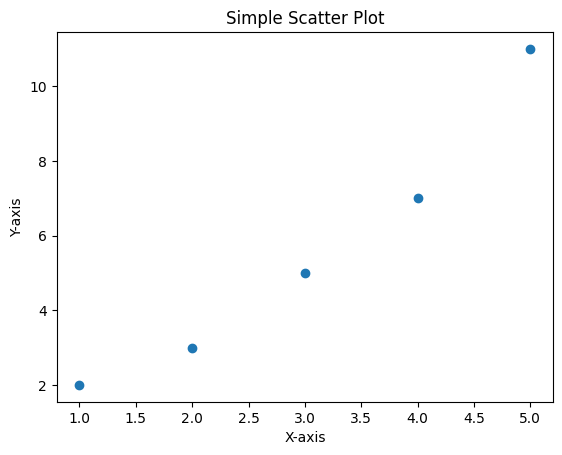

In [51]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

plt.scatter(x, y)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Scatter Plot')

plt.show()


#Q4. How do you calculate the correlation matrix using Seaborn and visualize it with a heatmap?


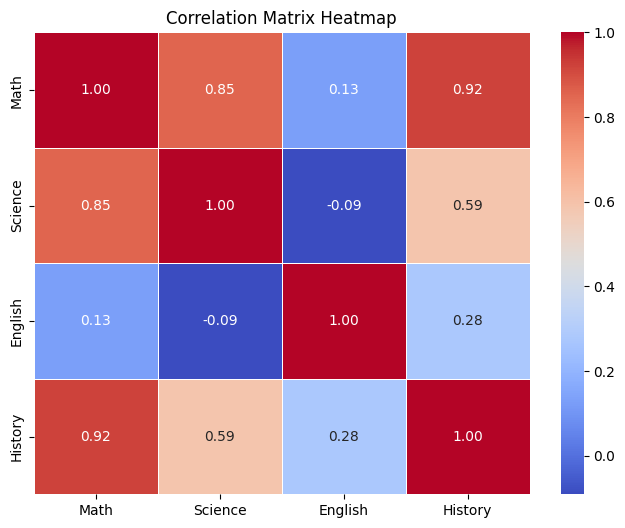

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Math': [85, 90, 78, 92, 88],
    'Science': [89, 94, 75, 90, 84],
    'English': [78, 85, 88, 92, 80],
    'History': [80, 83, 77, 88, 85]
}

df = pd.DataFrame(data)

correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.show()


#Q5. Generate a bar plot using Plotly?

In [53]:
import plotly.express as px

data = {
    'Category': ['A', 'B', 'C', 'D'],
    'Values': [10, 20, 15, 25]
}

fig = px.bar(
    data,
    x='Category',
    y='Values',
    title='Bar Plot Example',
    labels={'Values': 'Value Count', 'Category': 'Category Type'},
    color='Category',
    text='Values'
)

fig.show()


#Q6. Create a DataFrame and add a new column based on an existing column?

In [55]:
import pandas as pd

data = {
    'Name': ['Nitin', 'peggy', 'dolly', 'lokendra', 'yo boy'],
    'Age': [25, 30, 35, 40, 45]
}

df = pd.DataFrame(data)

df['Category'] = df['Age'].apply(lambda age: 'Youth' if age < 30 else ('Middle-aged' if age < 40 else 'Senior'))

print(df)


       Name  Age     Category
0     Nitin   25        Youth
1     peggy   30  Middle-aged
2     dolly   35  Middle-aged
3  lokendra   40       Senior
4    yo boy   45       Senior


#Q7. Write a program to perform element-wise multiplication of two NumPy arrays?

In [56]:
import numpy as np

array1 = np.array([1, 2, 3, 4, 5])
array2 = np.array([10, 20, 30, 40, 50])

result = np.multiply(array1, array2)

print("Array 1:", array1)
print("Array 2:", array2)
print("Element-wise Multiplication Result:", result)


Array 1: [1 2 3 4 5]
Array 2: [10 20 30 40 50]
Element-wise Multiplication Result: [ 10  40  90 160 250]


#Q8. Create a line plot with multiple lines using Matplotlib?

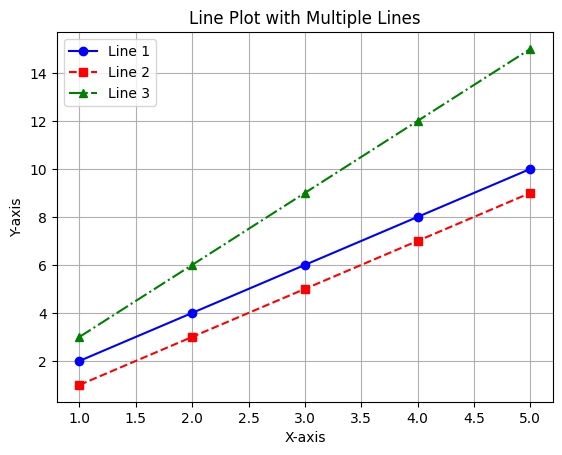

In [57]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y1 = [2, 4, 6, 8, 10]
y2 = [1, 3, 5, 7, 9]
y3 = [3, 6, 9, 12, 15]

plt.plot(x, y1, label='Line 1', color='blue', marker='o')
plt.plot(x, y2, label='Line 2', color='red', linestyle='--', marker='s')
plt.plot(x, y3, label='Line 3', color='green', linestyle='-.', marker='^')

plt.title('Line Plot with Multiple Lines')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)

plt.show()


#Q9. Generate a Pandas DataFrame and filter rows where a column value is greater than a threshold?


In [58]:
import pandas as pd

data = {
    'Name': ['Nitin', 'Dolly', 'Peggy', 'Lokendra', 'yo boy'],
    'Age': [25, 30, 35, 40, 45],
    'Score': [85, 90, 95, 70, 60]
}
df = pd.DataFrame(data)

filtered_df = df[df['Score'] > 80]

print("Original DataFrame:")
print(df)

print("\nFiltered DataFrame (Score > 80):")
print(filtered_df)


Original DataFrame:
       Name  Age  Score
0     Nitin   25     85
1     Dolly   30     90
2     Peggy   35     95
3  Lokendra   40     70
4    yo boy   45     60

Filtered DataFrame (Score > 80):
    Name  Age  Score
0  Nitin   25     85
1  Dolly   30     90
2  Peggy   35     95


#Q10. Create a histogram using Seaborn to visualize a distribution?


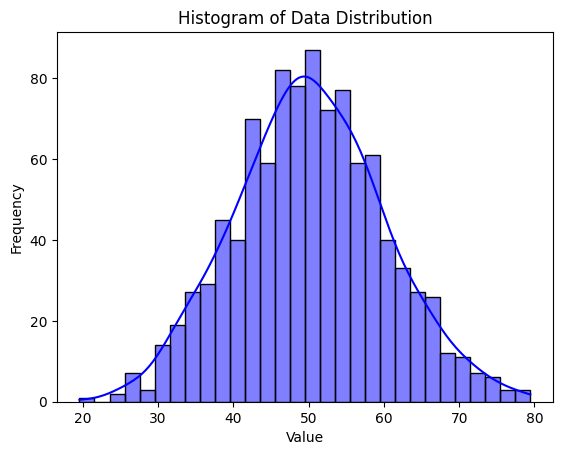

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = np.random.normal(loc=50, scale=10, size=1000)
sns.histplot(data, bins=30, kde=True, color='blue')

plt.title("Histogram of Data Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()


#Q11.  Perform matrix multiplication using NumPy?

In [60]:
import numpy as np

matrix1 = np.array([[1, 2, 3],
                    [4, 5, 6]])

matrix2 = np.array([[7, 8],
                    [9, 10],
                    [11, 12]])

result = np.dot(matrix1, matrix2)

print("Matrix 1:")
print(matrix1)

print("\nMatrix 2:")
print(matrix2)

print("\nResult of Matrix Multiplication:")
print(result)

Matrix 1:
[[1 2 3]
 [4 5 6]]

Matrix 2:
[[ 7  8]
 [ 9 10]
 [11 12]]

Result of Matrix Multiplication:
[[ 58  64]
 [139 154]]


#Q12. Use Pandas to load a CSV file and display its first 5 rows?


In [65]:
import pandas as pd

df = pd.read_csv('/content/sample_data/california_housing_train.csv')

print("First 5 rows of the DataFrame:")
print(df.head())

First 5 rows of the DataFrame:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  


#Q13. Create a 3D scatter plot using Plotly.

In [66]:
import plotly.express as px
import pandas as pd

data = {
    'x': [1, 2, 3, 4, 5],
    'y': [5, 4, 3, 2, 1],
    'z': [2, 3, 4, 5, 6],
    'label': ['A', 'B', 'C', 'D', 'E']
}

df = pd.DataFrame(data)

fig = px.scatter_3d(df, x='x', y='y', z='z', color='label', title="3D Scatter Plot")

fig.show()
